In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [6]:
iris = pd.read_excel('/content/glass.xlsx')

In [7]:
iris

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [9]:
unique_values = iris['Fe'].unique()

In [10]:
unique_values

array([0.  , 0.26, 0.11, 0.24, 0.17, 0.07, 0.19, 0.14, 0.22, 0.06, 0.3 ,
       0.16, 0.1 , 0.09, 0.31, 0.03, 0.12, 0.32, 0.15, 0.2 , 0.34, 0.28,
       0.08, 0.29, 0.21, 0.18, 0.25, 0.35, 0.37, 0.51, 0.05, 0.01])

In [11]:
iris.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
x=iris.iloc[:,0:9]
y=iris['Type']

In [13]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [14]:
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [15]:
# Splitting data into training and testing data set. 20% data kept aside for testing
# random_state=40: To make splitting consistent across multiple runs.
# output will be 4 dataframes: xtrain, xtest, ytrain and ytest
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [16]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
16,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.0,0.00
135,1.51789,13.19,3.90,1.30,72.33,0.55,8.44,0.0,0.28
122,1.51687,13.23,3.54,1.48,72.84,0.56,8.10,0.0,0.00
22,1.51736,12.78,3.62,1.29,72.79,0.59,8.70,0.0,0.00
80,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00
...,...,...,...,...,...,...,...,...,...
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.4,0.09
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.0,0.10


In [17]:
y_train

,Type
16,1
135,2
122,2
22,1
80,2
...,...
67,1
192,7
117,2
47,1


In [18]:
y_test

,Type
197,7
37,1
89,2
176,6
170,5
75,2
96,2
137,2
5,1
83,2


In [19]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2) # C5.0, max_depth of tree = 3.
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= 2.7\nentropy = 2.16\nsamples = 171\nvalue = [61, 57, 12, 11, 7, 23]'),
 Text(0.25, 0.5, 'x[7] <= 0.335\nentropy = 1.896\nsamples = 49\nvalue = [0, 11, 0, 11, 7, 20]'),
 Text(0.125, 0.16666666666666666, 'entropy = 1.809\nsamples = 30\nvalue = [0, 11, 0, 10, 7, 2]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.297\nsamples = 19\nvalue = [0, 0, 0, 1, 0, 18]'),
 Text(0.75, 0.5, 'x[3] <= 1.42\nentropy = 1.491\nsamples = 122\nvalue = [61, 46, 12, 0, 0, 3]'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.257\nsamples = 81\nvalue = [56, 14, 10, 0, 0, 1]'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.074\nsamples = 41\nvalue = [5, 32, 2, 0, 0, 2]')]

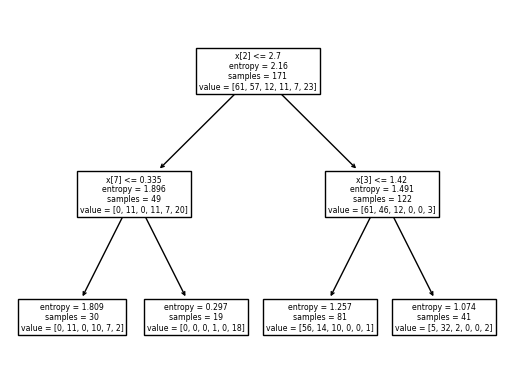

In [20]:
#PLot the decision tree
tree.plot_tree(model)

In [21]:
y_train.value_counts()

,count
Type,
1,61
2,57
7,23
3,12
5,11
6,7


In [22]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

,count
1,20
2,16
7,7


In [23]:
model.feature_importances_ # shows importance of features, SL SW PL PW, PW is most imp feature, then PW.
# same is seen in tree. Petal Width is root node

array([0.        , 0.        , 0.57801123, 0.22041617, 0.        ,
       0.        , 0.        , 0.2015726 , 0.        ])

In [24]:
preds # 1st data point belongs to class0, 2nd to 1, 3rd to 2 and so on

array([7, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 7, 1, 1, 1, 2, 2, 1,
       7, 7, 1, 1, 7, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 7, 2, 2])

In [25]:
(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions. Actual 1 - but it is predicted as 2

(197    7
 37     1
 89     2
 176    6
 170    5
 75     2
 96     2
 137    2
 5      1
 83     2
 55     1
 145    2
 160    3
 112    2
 74     2
 202    7
 126    2
 12     1
 153    3
 158    3
 168    5
 141    2
 194    7
 189    7
 144    2
 18     1
 208    7
 15     1
 86     2
 71     2
 7      1
 63     1
 143    2
 97     2
 136    2
 162    3
 33     1
 154    3
 90     2
 191    7
 106    2
 180    6
 139    2
 Name: Type, dtype: int64,
 array([7, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 7, 1, 1, 1, 2, 2, 1,
        7, 7, 1, 1, 7, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 7, 2, 2]))

In [26]:
# Accuracy
np.mean(preds==y_test)

0.5348837209302325

# Bagged Decision Trees for Classification

In [27]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:

x=iris.iloc[:,0:9]
y=iris['Type']

seed = 7
# kfold = KFold(n_splits=10,random_state=seed,shuffle=True) # evaluation method
# shuffle=True indicates that the data should be shuffled before splitting it into folds.
# Shuffling ensures that the data is randomly distributed across the folds.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=seed) #Classifier
results = cross_val_score(model, x, y, cv=kfold)

In [30]:
results

array([0.40909091, 0.86363636, 0.63636364, 0.72727273, 0.19047619,
       0.42857143, 0.52380952, 0.0952381 , 0.33333333, 0.9047619 ])

In [31]:
print(results.mean())

0.5112554112554113


# Random Forest Classification

In [32]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x=iris.iloc[:,0:9]
y=iris['Type']

num_trees = 100
max_features = 3 #Total features m=8, K=3 i.e. randomly select 3 features
kfold = KFold(n_splits=10)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features) # try random_state=2
results = cross_val_score(model, x, y, cv=kfold)

In [33]:
results

array([0.40909091, 0.90909091, 0.63636364, 0.81818182, 0.42857143,
       0.61904762, 0.61904762, 0.04761905, 0.23809524, 0.9047619 ])

In [34]:
print(results.mean())

0.562987012987013


# AdaBoost Classification

In [35]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

x=iris.iloc[:,0:9]
y=iris['Type']

num_trees = 10 # try 20,30
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)

In [36]:
results

array([0.45454545, 0.77272727, 0.59090909, 0.45454545, 0.38095238,
       0.38095238, 0.33333333, 0.23809524, 0.61904762, 0.52380952])

In [37]:
print(results.mean())

0.4748917748917748


# Stacking Ensemble for Classification

In [38]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import VotingClassifier

x=iris.iloc[:,0:9]
y=iris['Type']
kfold = KFold(n_splits=10)

# create the sub models
estimators = [] # create empty list for different algorithms

model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svc', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [39]:
estimators

[('logistic', LogisticRegression(max_iter=500)),
 ('cart', DecisionTreeClassifier()),
 ('svc', SVC())]

In [40]:
results

array([0.27272727, 0.22727273, 0.36363636, 0.22727273, 0.0952381 ,
       0.23809524, 0.19047619, 0.04761905, 0.14285714, 0.80952381])